# IT Academy - Data Science with Python
## Sprint 6: Data, Probabilities & Statistics
### [Github Data, Probabilities & Statistics](https://github.com/jesussantana/Statistics)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Statistics.svg)](https://wakatime.com/badge/github/jesussantana/Statistics)

### Exercise 1:  

  - Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, median, standard deviation, and arithmetic mean.

In [1]:
import pandas as pd 
import numpy as np
import datetime
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats.mstats import gmean,hmean

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

In [2]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB_Stats.csv'

df_raw = pd.read_csv(path+file)

In [3]:
df = df_raw.copy()

In [4]:
df.head()

playerID    Player Name  weight  height bats throws  Season League teamID  \
0  aardsda01  David Aardsma     215      75    R      R    2004     NL    SFN   
1  aardsda01  David Aardsma     215      75    R      R    2007     AL    CHA   
2  aardsda01  David Aardsma     215      75    R      R    2008     AL    BOS   
3  aardsda01  David Aardsma     215      75    R      R    2009     AL    SEA   
4  aardsda01  David Aardsma     215      75    R      R    2012     AL    NYA   

                   Team             Franchise   G  AB  R  H  2B  3B  HR  RBI  \
0  San Francisco Giants  San Francisco Giants  11   0  0  0   0   0   0    0   
1     Chicago White Sox     Chicago White Sox  25   0  0  0   0   0   0    0   
2        Boston Red Sox        Boston Red Sox  47   1  0  0   0   0   0    0   
3      Seattle Mariners      Seattle Mariners  73   0  0  0   0   0   0    0   
4      New York Yankees      New York Yankees   1   0  0  0   0   0   0    0   

   SB  BB  SO  salary  IBB  HBP  SH  SF  PA  
0   0   0   0  300000    0    0   0   0   0  
1   0   0   0  387500    0    0   0   0   0  
2   0   0   1  403250    0    0   0   0   1  
3   0   0   0  419000    0    0   0   0   0  
4   0   0   0  500000    0    0   0   0   0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   playerID     28293 non-null  object
 1   Player Name  28293 non-null  object
 2   weight       28293 non-null  int64 
 3   height       28293 non-null  int64 
 4   bats         28293 non-null  object
 5   throws       28293 non-null  object
 6   Season       28293 non-null  int64 
 7   League       28293 non-null  object
 8   teamID       28293 non-null  object
 9   Team         28293 non-null  object
 10  Franchise    28293 non-null  object
 11  G            28293 non-null  int64 
 12  AB           28293 non-null  int64 
 13  R            28293 non-null  int64 
 14  H            28293 non-null  int64 
 15  2B           28293 non-null  int64 
 16  3B           28293 non-null  int64 
 17  HR           28293 non-null  int64 
 18  RBI          28293 non-null  int64 
 19  SB           28293 non-nu

In [6]:
df.shape

(28293, 28)

In [7]:
df.columns

Index(['playerID', 'Player Name', 'weight', 'height', 'bats', 'throws',
       'Season', 'League', 'teamID', 'Team', 'Franchise', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'salary', 'IBB', 'HBP', 'SH',
       'SF', 'PA'],
      dtype='object')

In [8]:
df.describe().round(2)

weight    height    Season         G        AB         R         H  \
count  28293.00  28293.00  28293.00  28293.00  28293.00  28293.00  28293.00   
mean     199.05     73.50   2000.94     63.93    161.88     21.79     42.62   
std       22.65      2.29      8.90     47.29    199.41     30.13     56.20   
min      140.00     66.00   1985.00      1.00      0.00      0.00      0.00   
25%      185.00     72.00   1994.00     26.00      1.00      0.00      0.00   
50%      195.00     74.00   2001.00     50.00     57.00      4.00     10.00   
75%      215.00     75.00   2009.00    101.00    298.00     37.00     76.00   
max      315.00     83.00   2016.00    163.00    716.00    152.00    262.00   

             2B        3B        HR       RBI        SB        BB        SO  \
count  28293.00  28293.00  28293.00  28293.00  28293.00  28293.00  28293.00   
mean       8.22      0.91      4.78     20.78      3.11     15.80     30.38   
std       11.40      1.83      8.38     29.70      7.49     23.04     37.62   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
50%        2.00      0.00      0.00      4.00      0.00      3.00     15.00   
75%       14.00      1.00      6.00     34.00      2.00     25.00     50.00   
max       59.00     23.00     73.00    165.00    110.00    232.00    223.00   

            salary       IBB       HBP        SH        SF        PA  
count     28293.00  28293.00  28293.00  28293.00  28293.00  28293.00  
mean    2112965.47      1.33      1.45      1.53      1.37    183.36  
std     3440239.06      3.16      2.78      2.75      2.21    226.22  
min       10900.00      0.00      0.00      0.00      0.00      0.00  
25%      300000.00      0.00      0.00      0.00      0.00      1.00  
50%      600000.00      0.00      0.00      0.00      0.00     66.00  
75%     2425000.00      1.00      2.00      2.00      2.00    337.00  
max    33000000.00    120.00     35.00     39.00     17.00    783.00

In [9]:
df.describe(include=['object'])

playerID    Player Name   bats throws League teamID            Team  \
count       28293          28293  28293  28293  28293  28293           28293   
unique       5005           4931      3      2      2     35              35   
top     moyerja01  Alex Gonzalez      R      R     NL    BOS  Boston Red Sox   
freq           27             33  17456  22188  14459   1057            1057   

             Franchise  
count            28293  
unique              30  
top     Boston Red Sox  
freq              1057

In [10]:
df.Team.unique()

array(['San Francisco Giants', 'Chicago White Sox', 'Boston Red Sox',
       'Seattle Mariners', 'New York Yankees', 'New York Mets',
       'Baltimore Orioles', 'Cincinnati Reds', 'Houston Astros',
       'Oakland Athletics', 'Minnesota Twins', 'Florida Marlins',
       'California Angels', 'Milwaukee Brewers', 'Atlanta Braves',
       'Colorado Rockies', 'Philadelphia Phillies',
       'Tampa Bay Devil Rays', 'Kansas City Royals', 'San Diego Padres',
       'Los Angeles Angels of Anaheim', 'Los Angeles Dodgers',
       'Arizona Diamondbacks', 'Toronto Blue Jays', 'St. Louis Cardinals',
       'Detroit Tigers', 'Cleveland Indians', 'Texas Rangers',
       'Chicago Cubs', 'Montreal Expos', 'Anaheim Angels',
       'Tampa Bay Rays', 'Pittsburgh Pirates', 'Miami Marlins',
       'Washington Nationals'], dtype=object)

In [11]:
df.Team.value_counts()

Boston Red Sox                   1057
Los Angeles Dodgers              1050
New York Yankees                 1033
Philadelphia Phillies            1026
Cleveland Indians                1024
San Diego Padres                 1004
Oakland Athletics                1002
Pittsburgh Pirates                999
Baltimore Orioles                 999
New York Mets                     995
St. Louis Cardinals               994
Kansas City Royals                993
Cincinnati Reds                   991
Chicago Cubs                      987
San Francisco Giants              985
Toronto Blue Jays                 979
Atlanta Braves                    970
Milwaukee Brewers                 963
Texas Rangers                     955
Detroit Tigers                    955
Chicago White Sox                 951
Seattle Mariners                  938
Houston Astros                    925
Minnesota Twins                   888
Colorado Rockies                  759
Florida Marlins                   627
Montreal Exp

## Runs Scored

### Mean  or Arithmetic Median 

In [12]:
df_mean = round(df.R.mean(), 2)
df_mean

21.79

### Median

In [13]:
df_median = round(df.R.median())
df_median

4

### Mode

In [14]:
df_mode = stats.mode(df.R)
df_mode

ModeResult(mode=array([0]), count=array([10555]))

### Standard Desviation

In [15]:
df_std = round(df.R.std(), 2)
df_std

30.13

### Resume

In [16]:
df.R.describe().round(2)

count    28293.00
mean        21.79
std         30.13
min          0.00
25%          0.00
50%          4.00
75%         37.00
max        152.00
Name: R, dtype: float64

### Exercise 2: 
  - Continuing with the sports topic data, select two attributes and calculate their correlation.

## Hits v Runs Scored

In [17]:
correlation =df[['H','R']].corr()
correlation

H         R
H  1.000000  0.973927
R  0.973927  1.000000

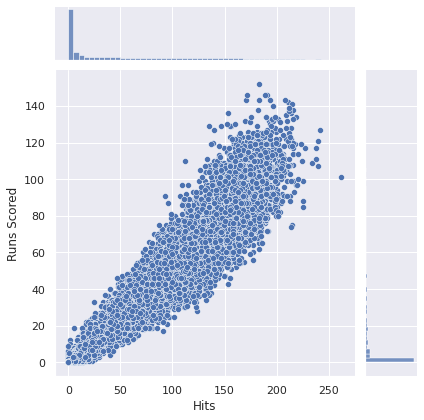

In [18]:
ax = sns.jointplot(df.H, df.R)
ax.set_axis_labels('Hits', 'Runs Scored')
plt.show()

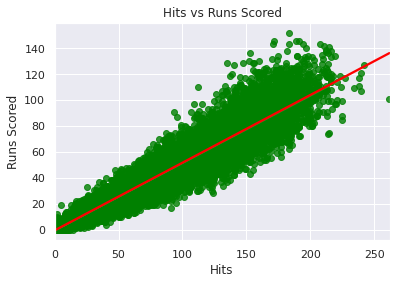

In [19]:
ax = sns.regplot('H', 'R', df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
ax.set(title='Hits vs Runs Scored',
        xlabel='Hits',
        ylabel='Runs Scored')
plt.show()

## Exercise 3
- Continuing with the sports theme data, calculate the correlation of all attributes with each other and represent them in a matrix with different colors of intensity.

### Pearson Correlation

- The Pearson Correlation measures the linear dependence between two variables X and Y.

- The resulting coefficient is a value between -1 and 1 inclusive, where:

  - 1: Total positive linear correlation.  

  - 0: No linear correlation, the two variables most likely do not affect each other.  

  - -1: Total negative linear correlation.  

Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap="magma")

### Exercise 4: 
  - Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.

## Games

### Geometric Mean

In [21]:
geometric_mean = round(gmean(df.loc[:,'G']), 2)
print("Geometric Mean is % s " % (geometric_mean))

Geometric Mean is 43.93 


### Harmonic Mean

In [22]:
harmonic_mean = round(hmean(df.loc[:,'G']), 2)
print("Harmonic Mean is % s " % (harmonic_mean))

Harmonic Mean is 22.37 
